## This task is based on dataset 
https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health
## It is made by Tilman Gabriel and Nazar Stegmann

Import necessary libraries for Data.Science

In [1]:
#%pip install pandas
#%pip install StandardScaler            
#%pip install matplotlib 
#%pip install seaborn

import pandas as pd
print("Pandas imported successfully!")
import numpy as np
print("NumPy imported successfully!")
import matplotlib.pyplot as plt
print("Matplotlib imported successfully!")
import seaborn as sns
print("Seaborn imported successfully!")
from sklearn import datasets, model_selection, preprocessing, metrics
print("Scikit-learn imported successfully!")

print("All libraries imported successfully!")

Pandas imported successfully!
NumPy imported successfully!
Matplotlib imported successfully!
Seaborn imported successfully!
Scikit-learn imported successfully!
All libraries imported successfully!


## Read data into dataset 
## Display first rows of the each columns as a first data overview

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  
Shape of the dataset: (886, 20)
Summary statistics of the dataset:
                id         age  

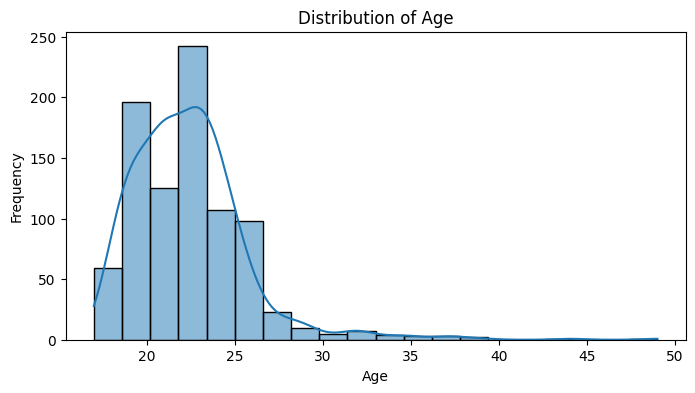

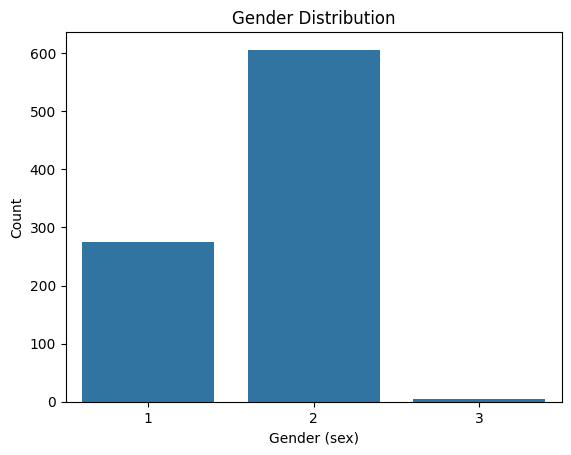

In [14]:
df = pd.read_csv('data/Data.csv')
df.dropna(inplace=True) # Drop missing values


# Display the first few rows of the dataset
print(df.head())

# display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")


# Display the summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe())

# Count missing values in each column
print("Missing values in total: ", df.isnull().sum().sum())
if df.isnull().sum().sum() > 0:
    print("Missing values in each column:")
    print(df.isnull().sum())
else:
    print("No missing values in the dataset.")

# Column    name 	                                                                    Description
# age 	    Age of the participant.                                                     (Integer)
# year 	    Year of study of the participant.                                           (Integer)
# sex 	    Gender of the participant.                                                  (String)
# glang 	Language spoken by the participant.                                         (String)
# job 	    Job of the participant.                                                     (String)
# stud_h 	Hours of study per week of the participant.                                 (Integer)
# health 	Self-reported health status of the participant.                             (String)
# psyt 	    Psychological distress score of the participant.                            (Integer)
# jspe 	    Job satisfaction score of the participant.                                  (Integer)
# qcae_cog 	Cognitive empathy score of the participant.                                 (Integer)
# qcae_aff 	Affective empathy score of the participant.                                 (Integer)
# amsp 	    Academic motivation score of the participant.                               (Integer)
# erec_mean Empathy rating score mean of the participant.                               (Integer)
# cesd 	    Center for Epidemiologic Studies Depression scale of the participant.       (Integer)
# stai_t 	State-Trait Anxiety Inventory scale of the participant.                     (Integer)
# mbi_ex 	Maslach Burnout Inventory-Exhaustion scale of the participant.              (Integer)
# mbi_cy 	Maslach Burnout Inventory - Cynicism Scale of the participant.              (Integer)
# mbi_ea 	Maslach Burnout Inventory - Profeh-ssional Efficacy Scale of the participant. (Integer)

#TODO
#DO WE NEED VISUALIZATIONS OF GENDER AND AGE?
# 1. Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Count of Age per Year remove # if needed
# print("Age counts:")
# print(df['age'].value_counts().sort_index())

# 2. Barplot of Gender Distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (sex)')
plt.ylabel('Count')
plt.show()

# exploratory data analysis (EDA) on the dataset
## statistical summaries and visualizations to understand the distribution of variables, relationships between them, and any potential outliers.


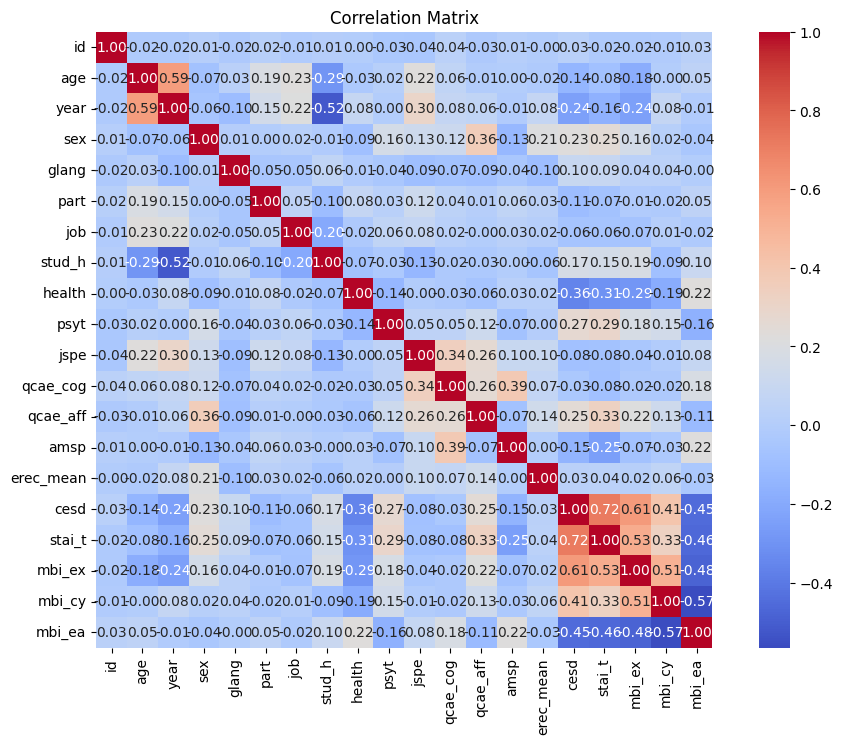

shows the correlation between different features in the dataset.
Strongly positiv or negatively correlated features can be identified, Values range from -1 to 1,
where: -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
Features with high correlation (close to 1 or -1) may indicate redundancy in the dataset,
while features with low correlation (close to 0) may indicate independence. The correlation matrix can help identify relationships between variables,
which may indicate multicollinearity or potential relationships worth exploring further.
pearsons correlation coefficient is a measure of the linear correlation between two variables,
Feature pairs with correlation between 0.5 and 0.7 (|corr| > 0.5 and <= 0.7):
year <-> age: 0.59
stud_h <-> year: -0.52
mbi_ex <-> cesd: 0.61
mbi_ex <-> stai_t: 0.53
mbi_cy <-> mbi_ex: 0.51
mbi_ea <-> mbi_cy: -0.57
Feature pairs with very strong correlation (|corr| > 0.7):
stai_t <-> c

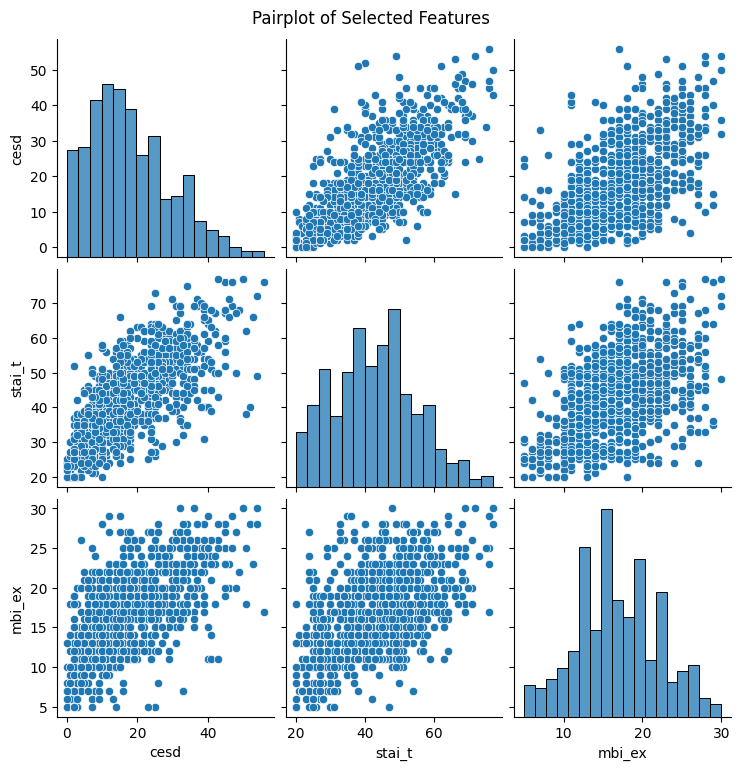

In [15]:
# 1. Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

print("shows the correlation between different features in the dataset.")
print("Strongly positiv or negatively correlated features can be identified, Values range from -1 to 1,")
print("where: -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.")
print("Features with high correlation (close to 1 or -1) may indicate redundancy in the dataset,")
print("while features with low correlation (close to 0) may indicate independence. The correlation matrix can help identify relationships between variables,")
print("which may indicate multicollinearity or potential relationships worth exploring further.")
print("pearsons correlation coefficient is a measure of the linear correlation between two variables,")


# Print out pairs of features with strong correlation (0.5 < |corr| <= 0.7)
corr_matrix = df.corr()
lower = 0.5
upper = 0.7
print(f"Feature pairs with correlation between {lower} and {upper} (|corr| > {lower} and <= {upper}):")
already_reported = set()
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and (idx, col) not in already_reported:
            corr_value = corr_matrix.loc[idx, col]
            if lower < abs(corr_value) <= upper:
                print(f"{idx} <-> {col}: {corr_value:.2f}")
                already_reported.add((col, idx))

# Print out pairs of features with very strong correlation (|corr| > 0.7)
threshold = 0.7
print(f"Feature pairs with very strong correlation (|corr| > {threshold}):")
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx and (idx, col) not in already_reported:
            corr_value = corr_matrix.loc[idx, col]
            if abs(corr_value) > threshold:
                print(f"{idx} <-> {col}: {corr_value:.2f}")
                already_reported.add((col, idx))



# 2. Pairplot for selected columns
    # Select columns with at least one absolute correlation > 0.6 (excluding self-correlation)
corr_threshold = 0.6
corr_matrix = df.corr().abs()
selected_cols = [col for col in corr_matrix.columns if any((corr_matrix[col].drop(col) > corr_threshold))]
print("Selected columns with correlation > 0.6:", selected_cols)
sns.pairplot(df[selected_cols])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Do PCA on the dataset 

Best k: 2 with silhouette score: 0.400
PCA1 loadings (feature influence):
cesd      0.603335
stai_t    0.582381
mbi_ex    0.544811
dtype: float64


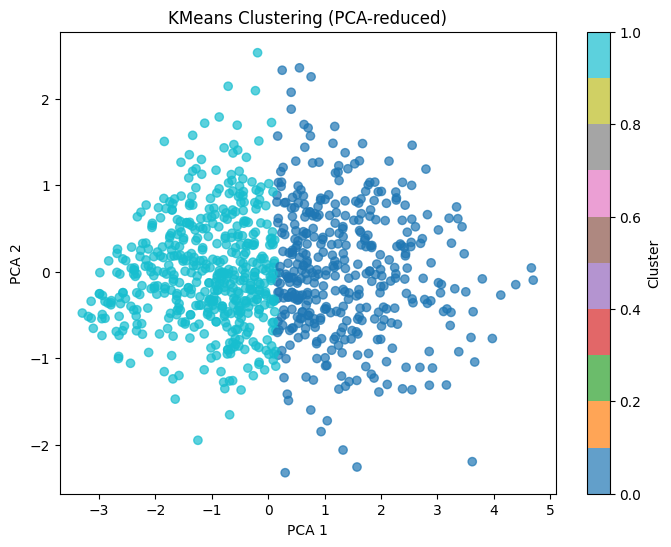

This could mean that one or more features (or a combination of them) are strongly differentiating the two groups,
and PCA1 is a weighted combination of those features.


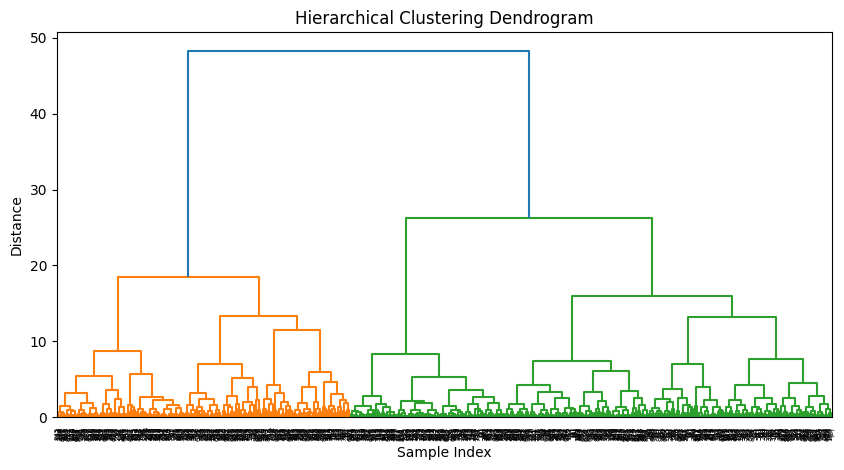

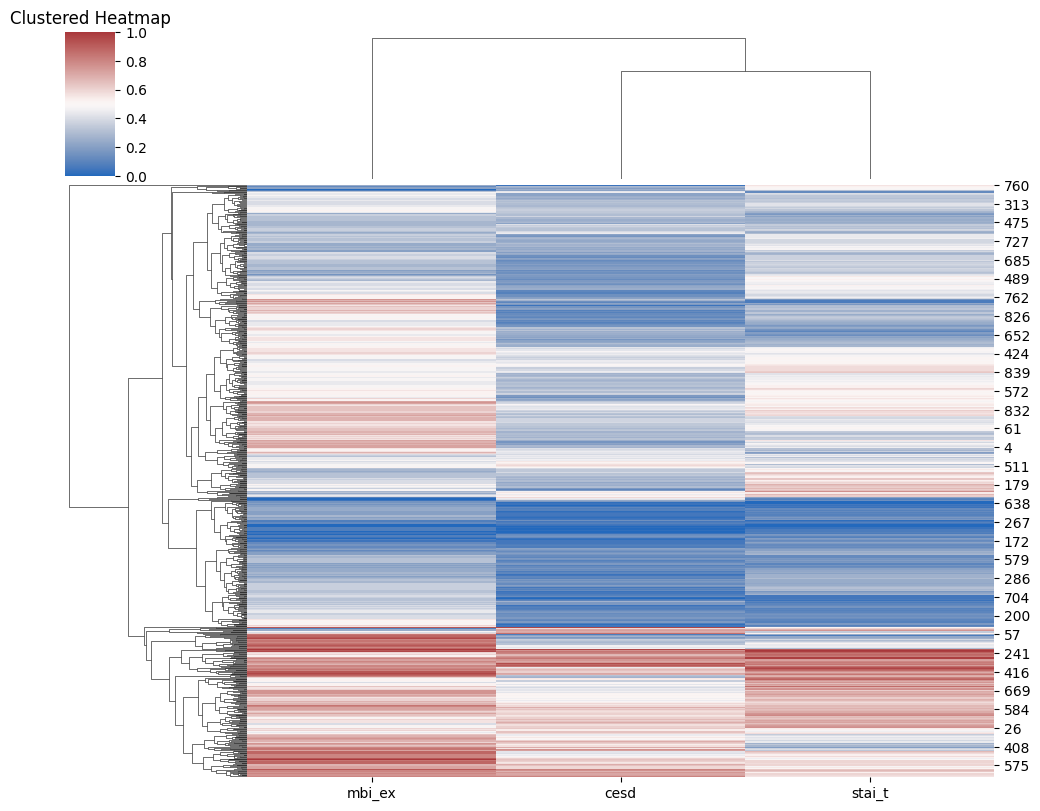

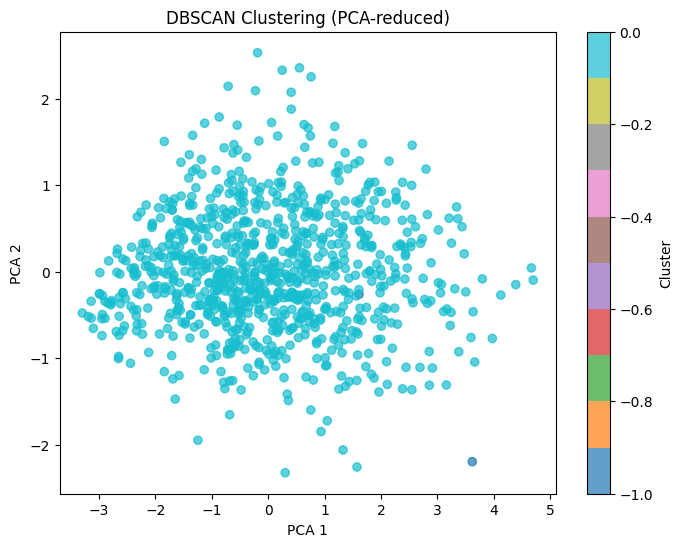

Code successfully executed.


In [ ]:
# PCA is used to reduce the dimensionality of the dataset while preserving as much variance as possible.
# This is particularly useful for visualization and can help improve the performance of clustering algorithms by reducing noise and redundancy.
# Perform clustering analysis on the dataset using KMeans, Hierarchical Clustering, and DBSCAN

# 1. Preprocess data using z-transformation
# selected columns for clustering are chosen based on correlation analysis within the last cell.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_cols])

# 2. KMeans clustering with silhouette analysis
silhouette_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = metrics.silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k: {best_k} with silhouette score: {max(silhouette_scores):.3f}")

# Fit KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 3. Visualize KMeans clustering using PCA, reducing to (n) dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get the loadings for PCA1
pca1_loadings = pca.components_[0]
feature_importance = pd.Series(pca1_loadings, index=selected_cols)
print("PCA1 loadings (feature influence):")
print(feature_importance.sort_values(ascending=False))


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title('KMeans Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
print("This could mean that one or more features (or a combination of them) are strongly differentiating the two groups,")
print("and PCA1 is a weighted combination of those features.")


# 4. Hierarchical clustering and dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 5. Heatmap with clustering
sns.clustermap(df[selected_cols], standard_scale=1, cmap='vlag', figsize=(10, 8))
plt.title('Clustered Heatmap')
plt.show()

# 6. Density-based clustering (DBSCAN)
dbscan = DBSCAN(eps=1.0, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', alpha=0.7)
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()



print("Code successfully executed.")



In [17]:
# ...existing code...
# After fitting PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get the loadings for PCA1
pca1_loadings = pca.components_[0]
feature_importance = pd.Series(pca1_loadings, index=selected_cols)
print("PCA1 loadings (feature influence):")
print(feature_importance.sort_values(ascending=False))
# ...existing code...

PCA1 loadings (feature influence):
cesd      0.603335
stai_t    0.582381
mbi_ex    0.544811
dtype: float64


Perform a Linear regression Model on the selected Variables

Linear Regression for cesd
Mean Squared Error: 63.113885053283745
R^2 Score: 0.519177628688372
Coefficients:
id: 0.0007
age: -0.0441
year: -0.6188
sex: 1.1326
glang: 0.0152
part: -0.6598
job: 0.0412
stud_h: 0.0230
health: -1.0243
psyt: 1.0172
jspe: -0.0129
qcae_cog: 0.0716
qcae_aff: 0.0107
amsp: 0.0290
erec_mean: 0.0638
stai_t: 0.4763
mbi_ex: 0.4133
mbi_cy: 0.2643
mbi_ea: -0.1826
Intercept: -8.108047182766693


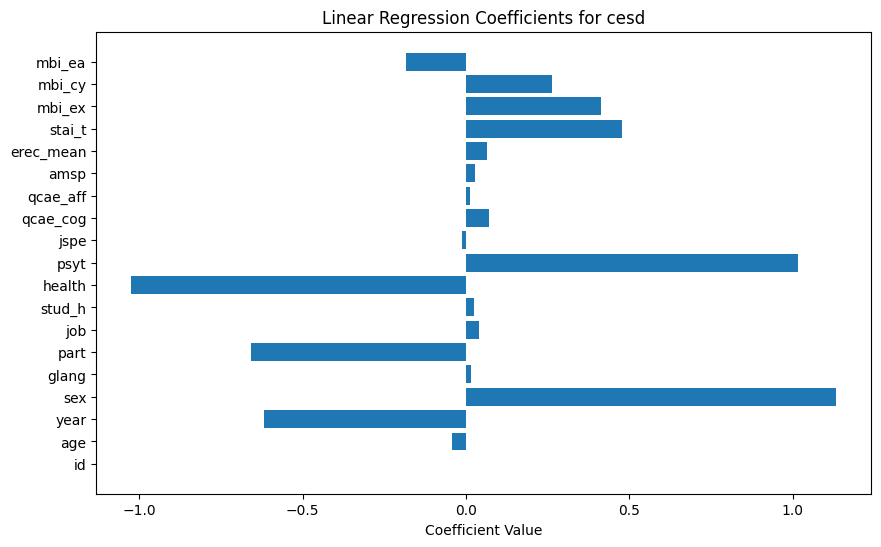

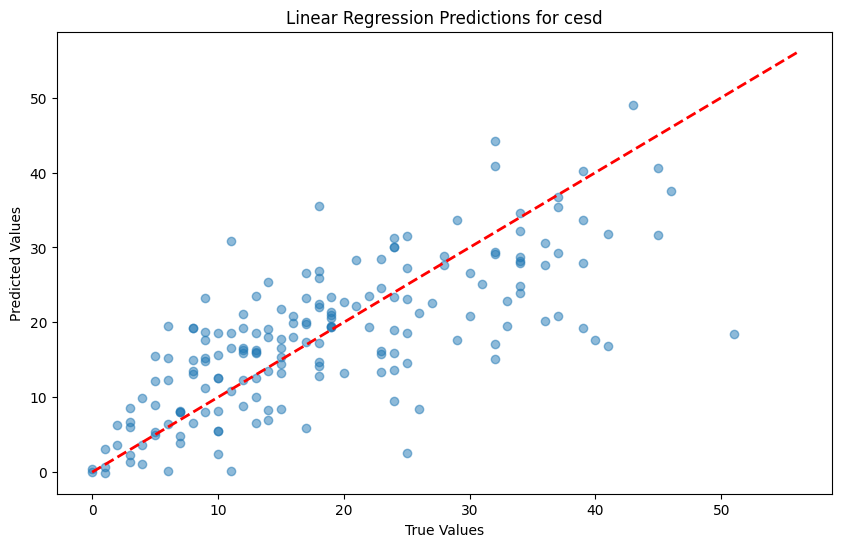

In [20]:
# Choose target variable: 'cesd', 'stai_t', or 'mbi_ex'
target = 'cesd'  # Change to 'stai_t' or 'mbi_ex' as needed

# Use all other numeric columns except the target as features
features = [col for col in df.select_dtypes(include=[np.number]).columns if col != target]

#reduce the number of features to 10 # Codejunk to reduce the number of features to 10 and rise the accuracy?
#features = features[:10]

X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression for {target}")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:")
for feat, coef in zip(features, lr.coef_):
    print(f"{feat}: {coef:.4f}")
print("Intercept:", lr.intercept_)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, lr.coef_)
plt.xlabel('Coefficient Value')
plt.title(f'Linear Regression Coefficients for {target}')
plt.show()

# Visualize thre regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression Predictions for {target}')
plt.show()
